In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import umap
import utils

In [2]:
# load data
df_in = pd.read_csv("data/df_wide_knn.csv") 
df = df_in.drop(["LATITUDE", "LONGITUDE", "LEV_M"], axis=1)  # remove geolocation

# scale data
scaler = MinMaxScaler().fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

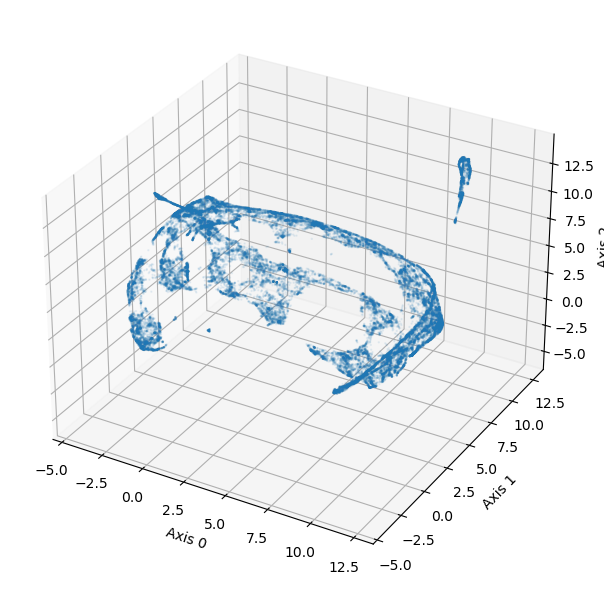

In [3]:
# compute embedding
embedding = umap.UMAP(min_dist=0.0, n_components=3, n_neighbors=20).fit_transform(df_scaled)

# visualize embedding
utils.plot_embedding(embedding, save_as=None)  # "output/umap_space.png"

In [4]:
df_in["e0"] = embedding[:, 0]
df_in["e1"] = embedding[:, 1]
df_in["e2"] = embedding[:, 2]

# KMeans

In [ ]:
kmeans_original = KMeans(**{"n_clusters": 2, "n_init": "auto"}).fit(df_scaled)
kmeans_original_y_pred = kmeans_original.predict(df_scaled)

In [ ]:
temp = df_in.copy()
temp["label"] = kmeans_original_y_pred
temp = utils.color_code_labels(df=temp, color_noise_black=False, drop_noise=True)

utils.coupled_label_plot(df=temp, color_label="color", save_dir="output_old/kmeans/", suffix="_onoriginal")

In [ ]:
kmeans_umap = KMeans(**{"n_clusters": 10, "n_init": "auto"}).fit(embedding)
kmeans_umap_y_pred = kmeans_umap.predict(embedding)

In [ ]:
temp = df_in.copy()
temp["label"] = kmeans_umap_y_pred
temp = utils.color_code_labels(df=temp, color_noise_black=False, drop_noise=True)

utils.coupled_label_plot(df=temp, color_label="color", save_dir="output_old/kmeans/", suffix="_onembedding")

# Agglomerative Ward's clustering

In [ ]:
ward_original = AgglomerativeClustering(**{"n_clusters": 2, "distance_threshold": None, "linkage": "ward"}).fit(df_scaled)
ward_original_y_pred = ward_original.labels_

In [ ]:
temp = df_in.copy()
temp["label"] = ward_original_y_pred
temp = utils.color_code_labels(df=temp, color_noise_black=False, drop_noise=True)

utils.coupled_label_plot(df=temp, color_label="color", save_dir="output_old/ward/", suffix="onoriginal")

In [ ]:
ward_umap = AgglomerativeClustering(**{"n_clusters": 22, "distance_threshold": None, "linkage": "ward"}).fit(embedding)
ward_umap_y_pred = ward_umap.labels_

In [ ]:
temp = df_in.copy()
temp["label"] = ward_umap_y_pred
temp = utils.color_code_labels(df=temp, color_noise_black=False, drop_noise=True)

utils.coupled_label_plot(df=temp, color_label="color", save_dir="output_old/ward/", suffix="_onembedding")

# DBSCAN

In [ ]:
dbscan_original = DBSCAN(**{"eps": 0.1, "min_samples": 3}).fit(df_scaled)
dbscan_original_y_pred = dbscan_original.labels_

In [ ]:
temp = df_in.copy()
temp["label"] = dbscan_original_y_pred
temp = utils.color_code_labels(df=temp, color_noise_black=False, drop_noise=True)

utils.coupled_label_plot(df=temp, color_label="color", save_dir="output_old/dbscan/", suffix="_onoriginal")

In [5]:
dbscan_umap = DBSCAN(**{"eps": 0.1, "min_samples": 3}).fit(embedding)
dbscan_umap_y_pred = dbscan_umap.labels_

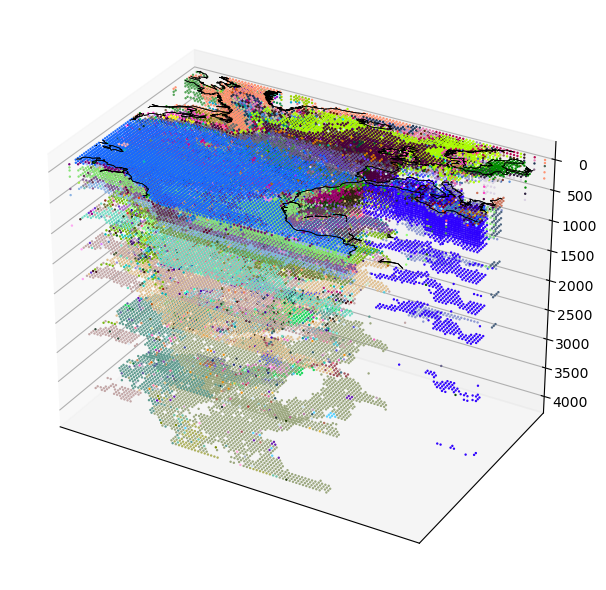

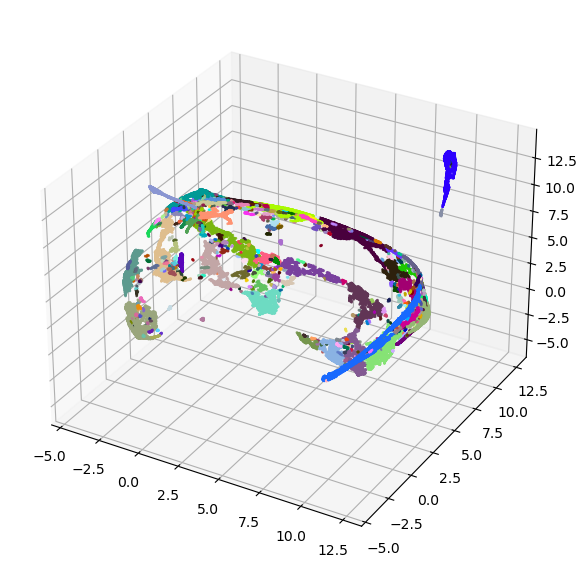

In [6]:
temp = df_in.copy()
temp["label"] = dbscan_umap_y_pred
temp = utils.color_code_labels(df=temp, color_noise_black=False, drop_noise=True)

utils.coupled_label_plot(df=temp, color_label="color", save_dir="output_old/dbscan/", suffix="_onembedding")

## DBSCAN post-processing

In [7]:
dbscan_out = temp.copy()

503


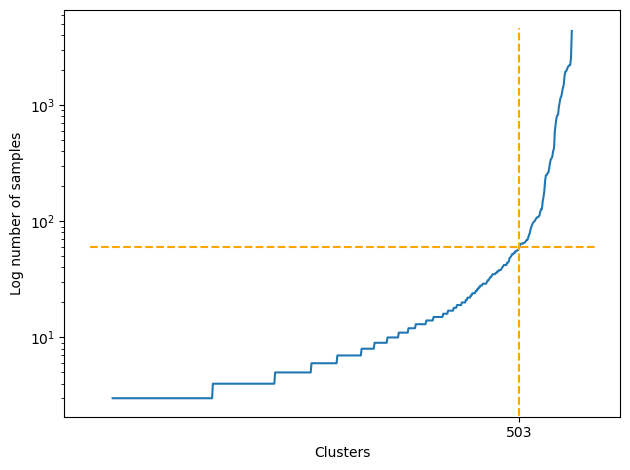

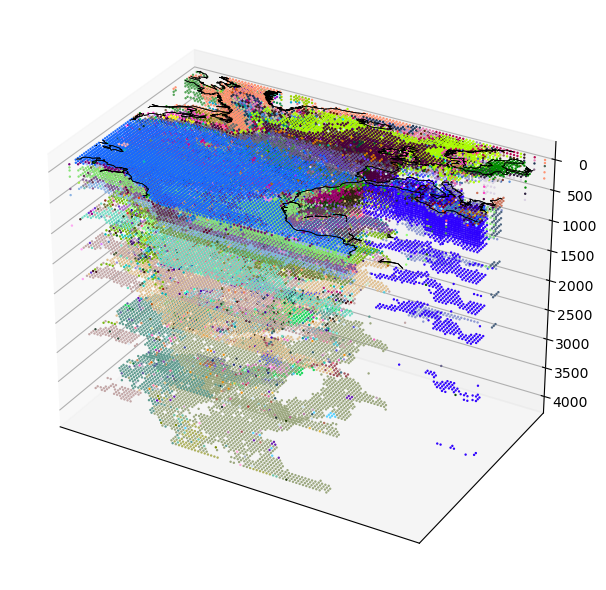

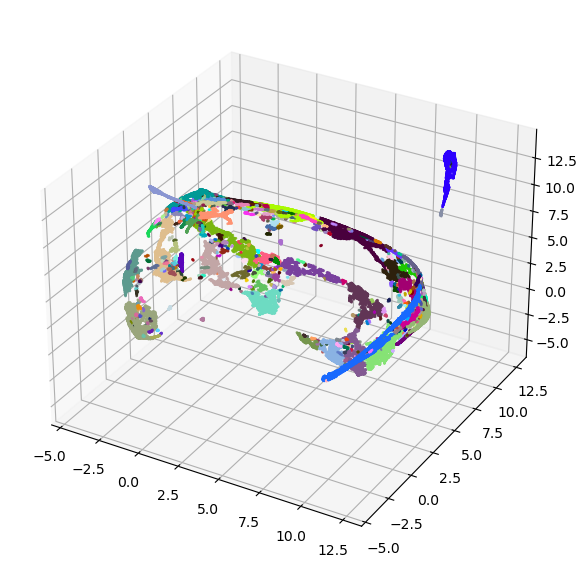

In [8]:
# drop small clusters, manual thresh
dropped = utils.drop_clusters_with_few_samples(dbscan_out, thresh=60, save_dir="output_old/dbscan/", suffix="_manualelbow")

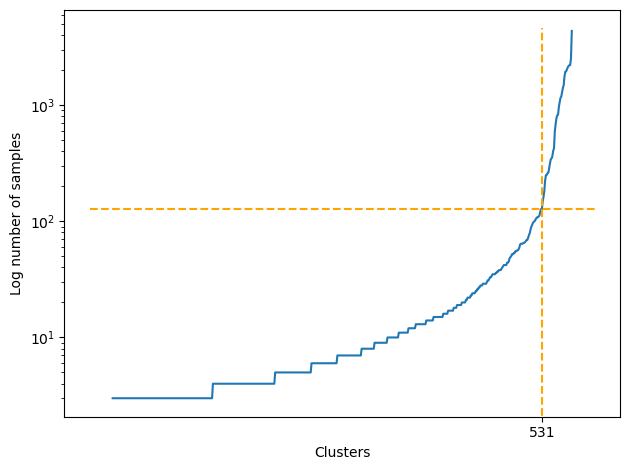

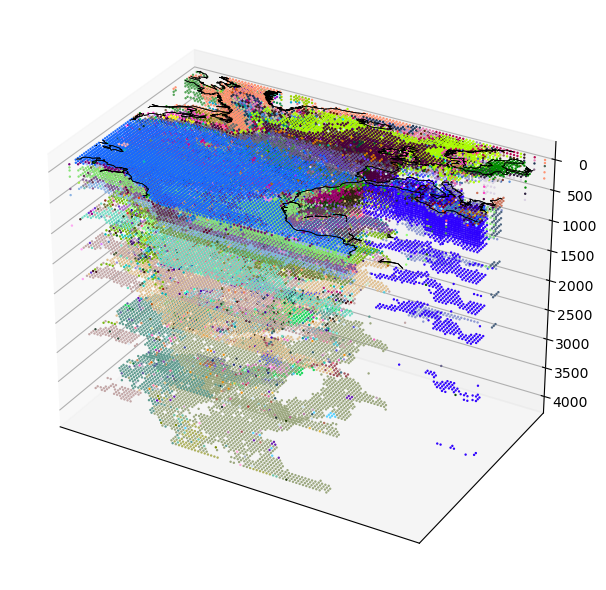

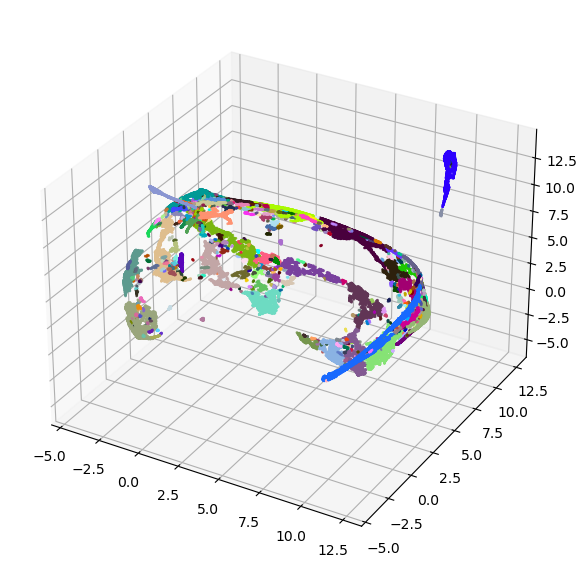

In [9]:
# drop small clusters, automatic thresh
out = utils.drop_clusters_with_few_samples(dbscan_out, thresh=None, save_dir="output_old/dbscan/", suffix="_autoelbow")

In [ ]:
# merge small clusters, n_clusters set to DBSCAN cluster number after manual thresh
model = AgglomerativeClustering(**{"n_clusters": 83, "distance_threshold": None, "linkage": "ward"}).fit(dbscan_out[["label", "e0", "e1", "e2"]])
y_pred = model.labels_

temp = df_in.copy()
temp["label"] = y_pred
temp = utils.color_code_labels(df=temp, color_noise_black=False, drop_noise=True)

utils.coupled_label_plot(df=temp, color_label="color", save_dir="output_old/dbscan/", suffix="_aggWard83")

In [ ]:
# merge small clusters, n_clusters set to DBSCAN cluster number after automatic thresh
model = AgglomerativeClustering(**{"n_clusters": 25, "distance_threshold": None, "linkage": "ward"}).fit(dbscan_out[["label", "e0", "e1", "e2"]])
y_pred = model.labels_

temp = df_in.copy()
temp["label"] = y_pred
temp = utils.color_code_labels(df=temp, color_noise_black=False, drop_noise=True)

utils.coupled_label_plot(df=temp, color_label="color", save_dir="output_old/dbscan/", suffix="_aggWard25")

Questions...

dbscan_out_filtered or dbscan_out?

include label in clustering or not?